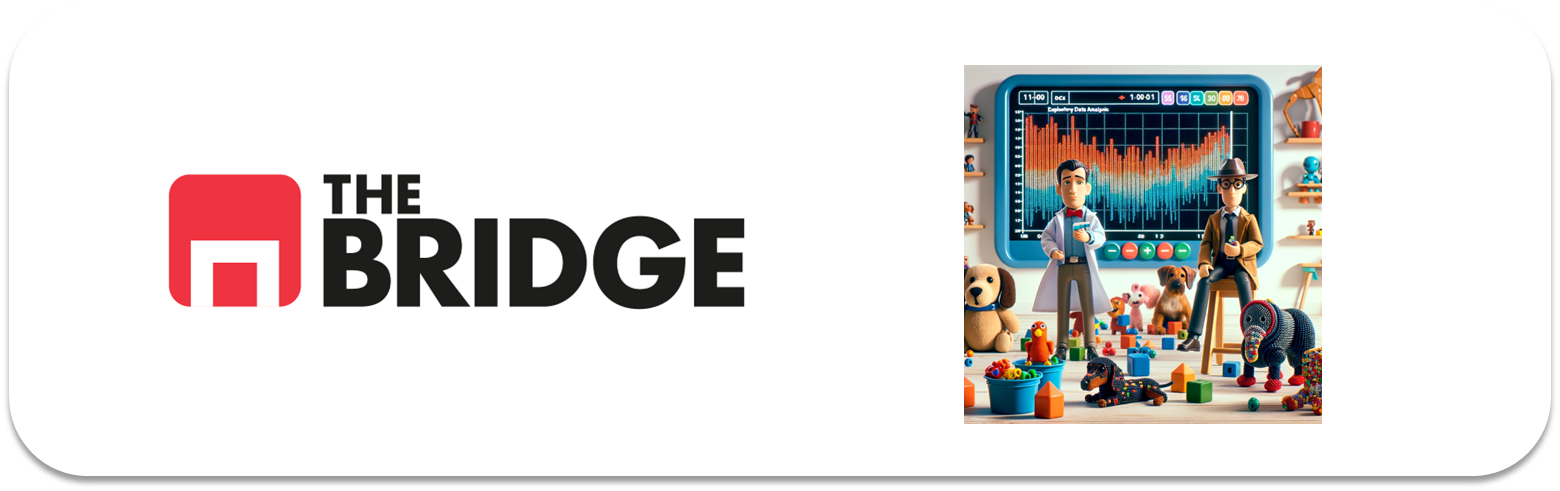

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [54]:
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion

from scipy.stats import chi2_contingency, mannwhitneyu

pd.options.mode.copy_on_write = True

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [55]:
df_titanic=pd.read_csv("/Users/jefer/Downloads/titanic.csv")

In [56]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [57]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"],inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [58]:
df_titanic["family_members"]=df_titanic["parch"]+df_titanic["sibsp"]

In [59]:
df_titanic.drop(columns=["parch","sibsp"],inplace=True)

In [60]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [61]:
embark_town_mode=df_titanic["embark_town"].mode()[0]

In [62]:
df_titanic.loc[df_titanic["embark_town"].isna(),"embark_town"]=embark_town_mode

In [63]:
df_titanic.isna().sum()

sex                 0
age               177
fare                0
class               0
who                 0
adult_male          0
embark_town         0
alive               0
alone               0
family_members      0
dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [64]:
df_titanic["age_imputed"] = df_titanic.age.isna()

is_woman = df_titanic.who == "woman"
is_child = df_titanic.who == "child"
is_man = df_titanic.who == "man"

mediana_woman = df_titanic.loc[is_woman,"age"].median()
mediana_child = df_titanic.loc[is_child,"age"].median() 
mediana_man = df_titanic.loc[is_man,"age"].median()

df_titanic.loc[is_woman & df_titanic["age_imputed"], "age"] = mediana_woman
df_titanic.loc[is_child & df_titanic["age_imputed"], "age"] = mediana_child
df_titanic.loc[is_man & df_titanic["age_imputed"], "age"] = mediana_man

In [65]:
df_titanic.isna().sum()

sex               0
age               0
fare              0
class             0
who               0
adult_male        0
embark_town       0
alive             0
alone             0
family_members    0
age_imputed       0
dtype: int64

In [66]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_imputed
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,False
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,False
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,False
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,False
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,False
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0,False
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0,False
888,female,30.0,23.4500,Third,woman,False,Southampton,no,False,3,True
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0,False


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

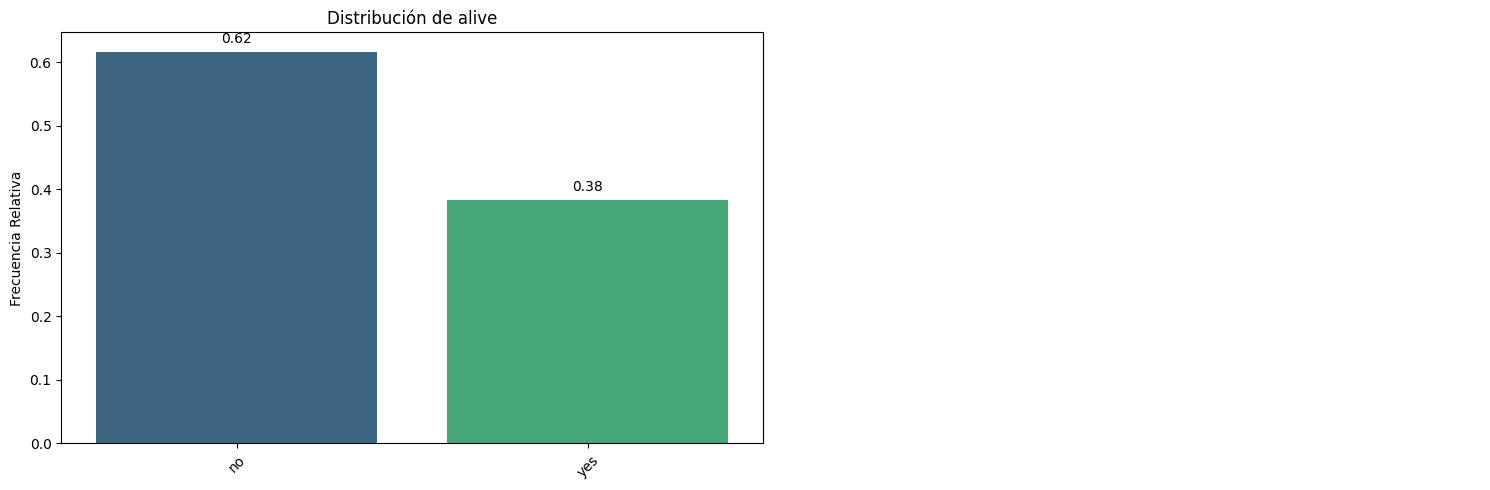

In [67]:
pinta_distribucion_categoricas(df_titanic, ["alive"], relativa= True, mostrar_valores= True)

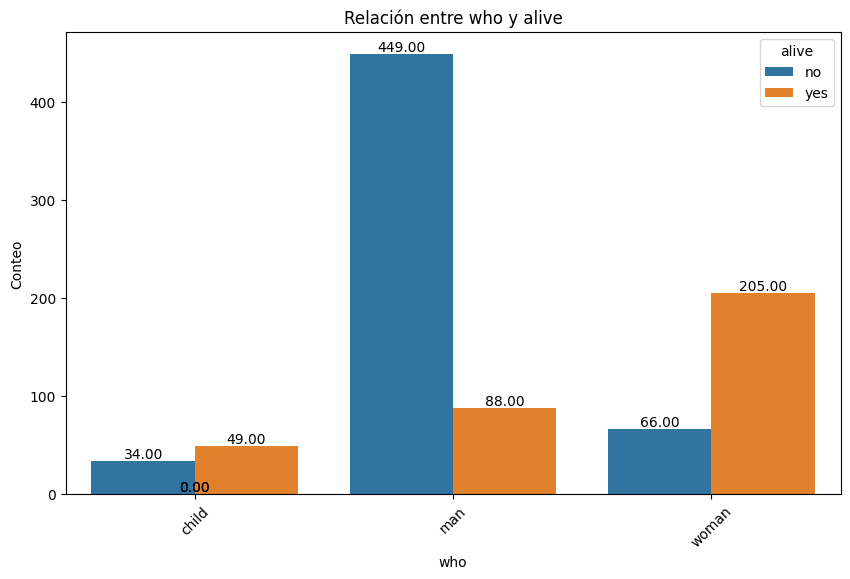

In [68]:
#1
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

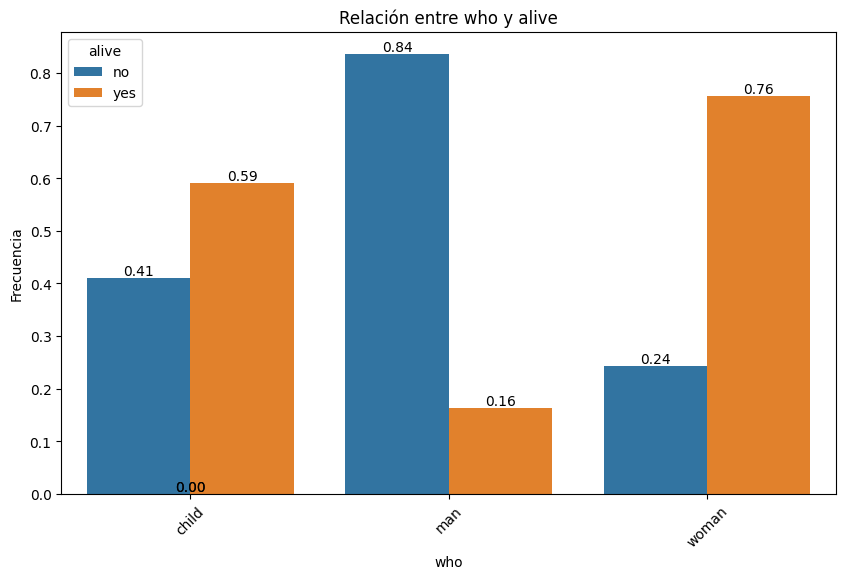

In [69]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq= True, show_values= True)

La cantidad de hombre que murieron es mucho mayor a la que sobrevivió al contrario del números de mujeres que murieron y sobrevivieron.
Relativamente también muestra datos parecidos 84% fallecidos hombres-16% sobrevivientes hombres.

In [70]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["who"])
tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [71]:
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


Si que tienen relacion ya que Chi cuadro es alto y P_value es mayor que 0.05

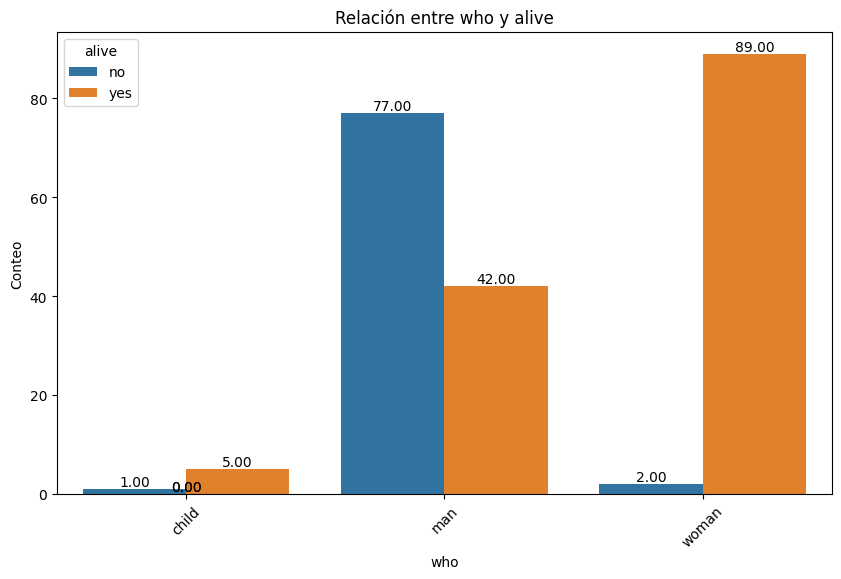

In [72]:
df_first=df_titanic.loc[df_titanic["class"]=="First",["who", "alive"]]
plot_categorical_relationship_fin(df_first, "who", "alive", relative_freq=False, show_values=True)


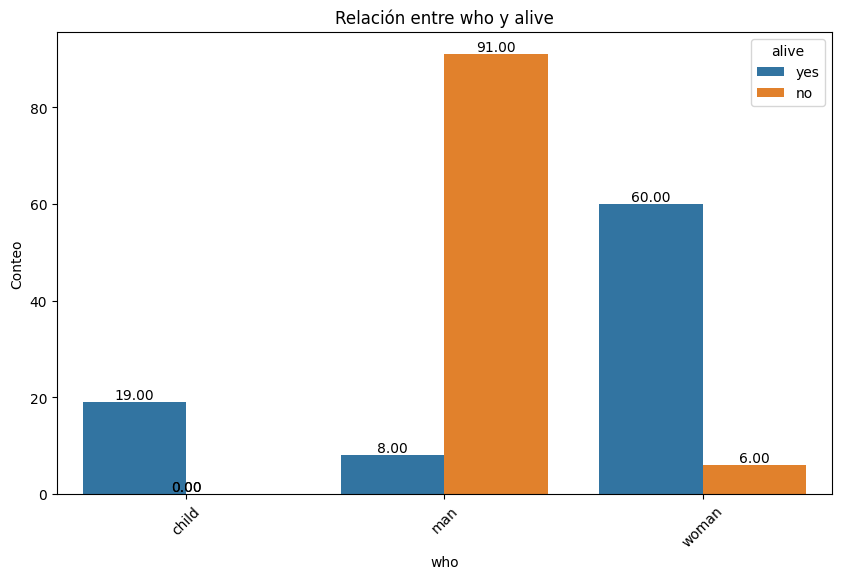

In [73]:
df_Second=df_titanic.loc[df_titanic["class"]=="Second",["who", "alive"]]
plot_categorical_relationship_fin(df_Second, "who", "alive", relative_freq=False, show_values=True)


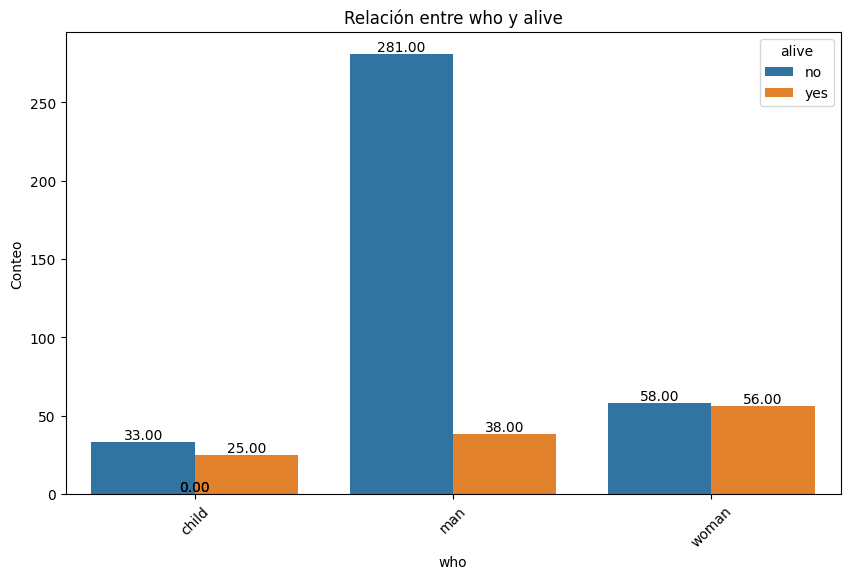

In [74]:
df_Third=df_titanic.loc[df_titanic["class"]=="Third",["who", "alive"]]
plot_categorical_relationship_fin(df_Third, "who", "alive", relative_freq=False, show_values=True)


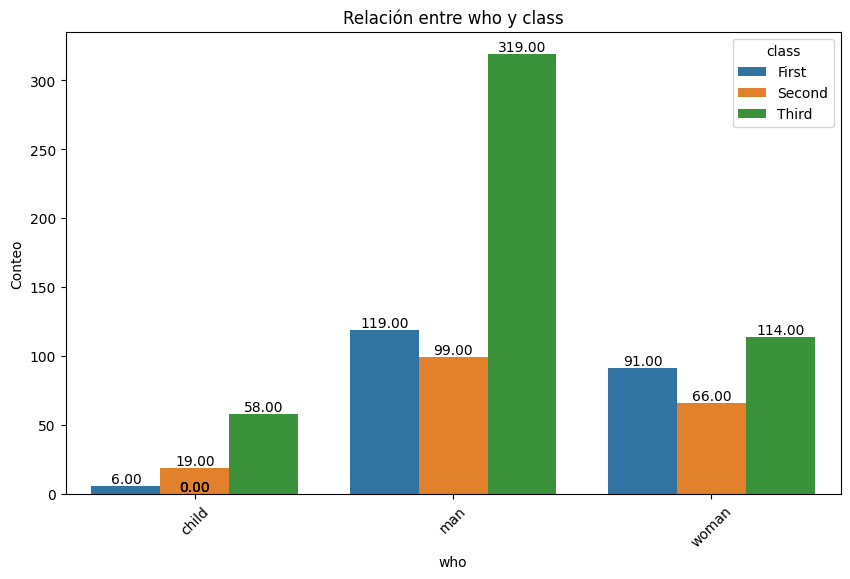

In [75]:
plot_categorical_relationship_fin(df_titanic, "who", "class", relative_freq=False, show_values=True)

También hay muchos niños que estaban en tercera por lo que explica que la mortalidad de los niños alla sido alta

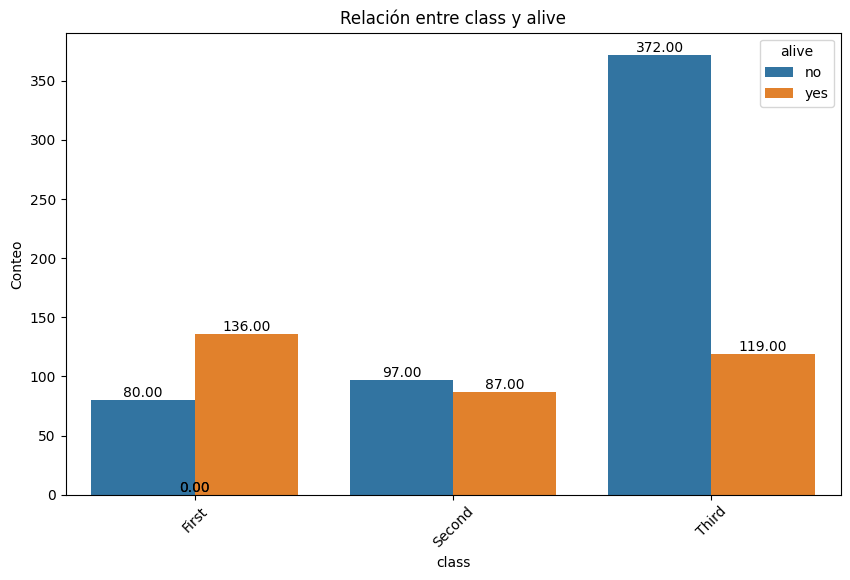

In [76]:
#2
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True)

Sobrevivieron más personas de la primera clase

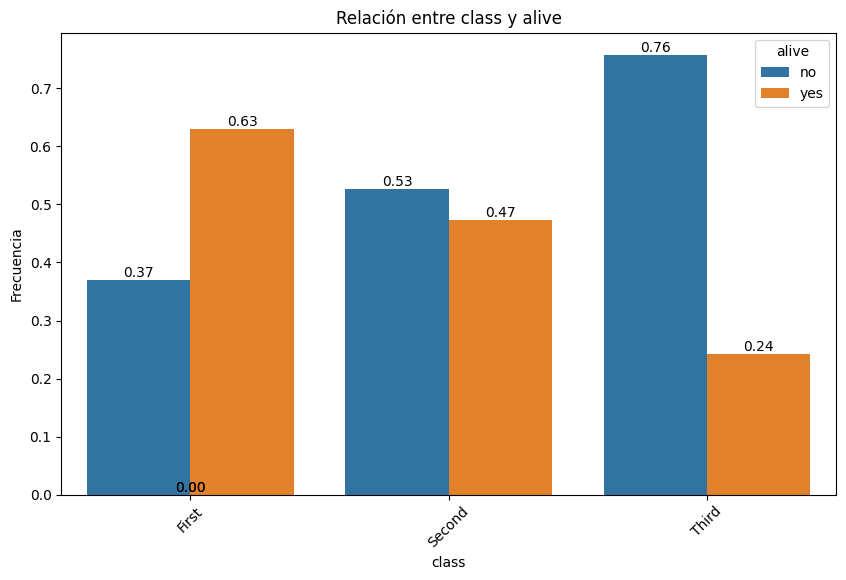

In [77]:
plot_categorical_relationship_fin(df_titanic, "class","alive",relative_freq=True, show_values = True)

En frecuencia relativa también indica que sobrevivieron más los que estaban en primera clase

In [78]:
tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["class"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


al ser P_value menor que 0.05 si que existe una relación

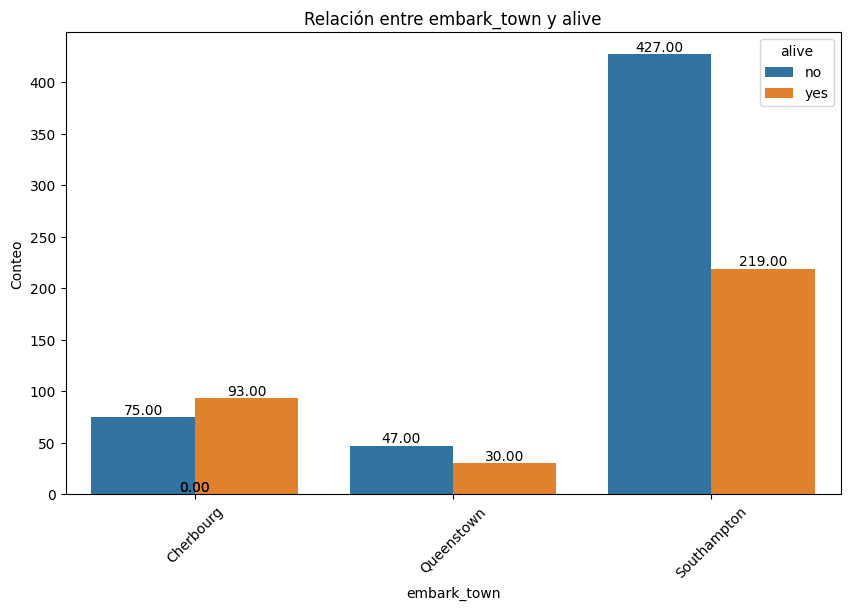

In [79]:
#3
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

Sobrevivieron más personas de Southampton

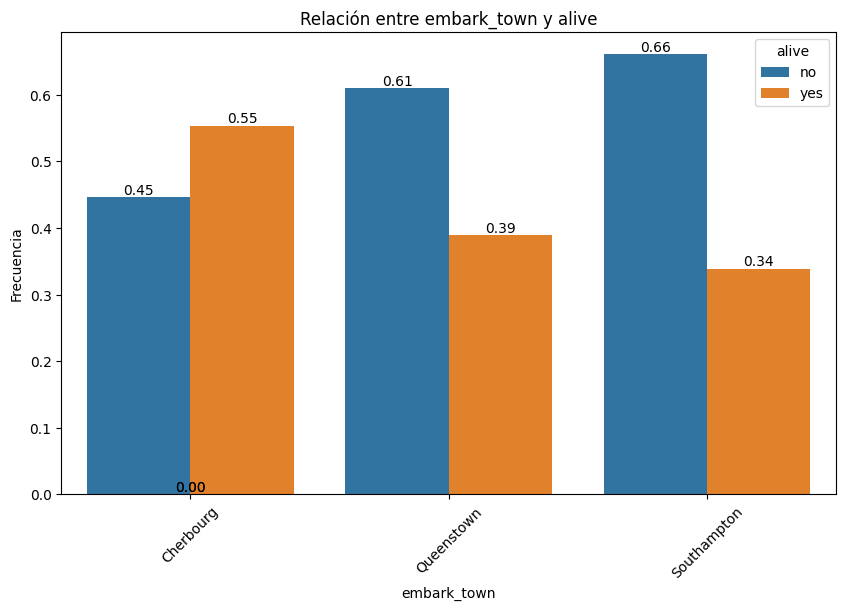

In [80]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive",  show_values= True, relative_freq= True)

El porcentaje muestra que el 55% de Cherbourg sobrevivió a pesar de que los de Southampton han sido el número más alto de sobrevivientes.Se debe de profundizar sobre la supervivencia de las ciudades de origen

In [81]:
tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


Si hay dependencia P-Value <0.05

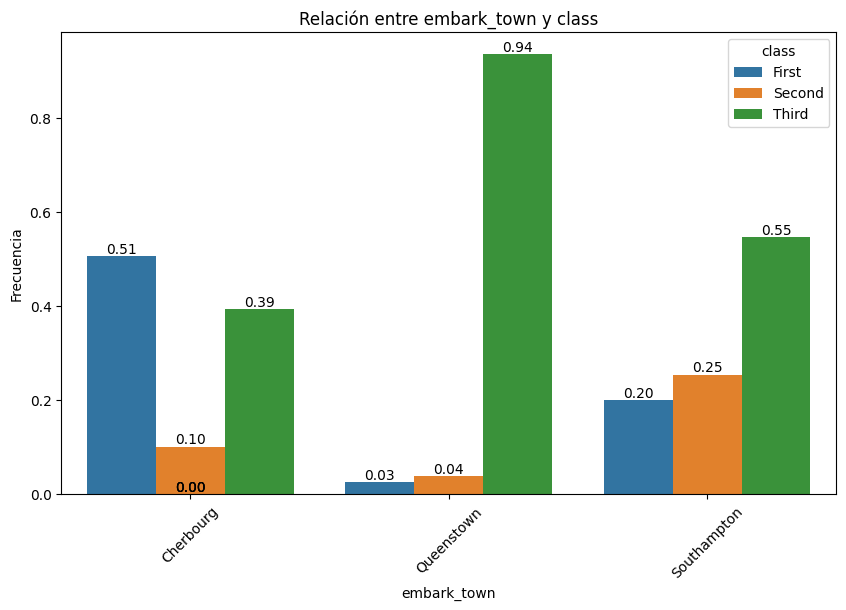

In [82]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", relative_freq= True, show_values= True)

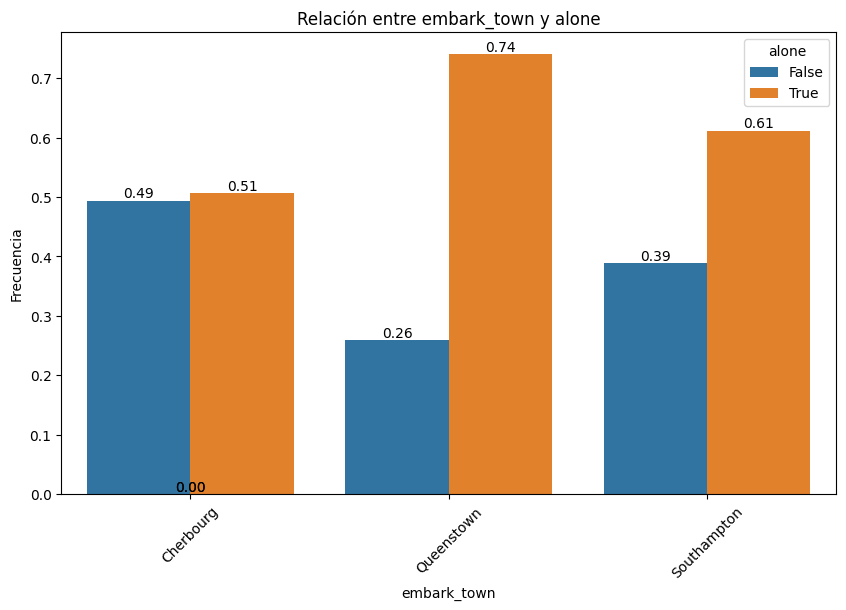

In [83]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alone", relative_freq= True, show_values= True)

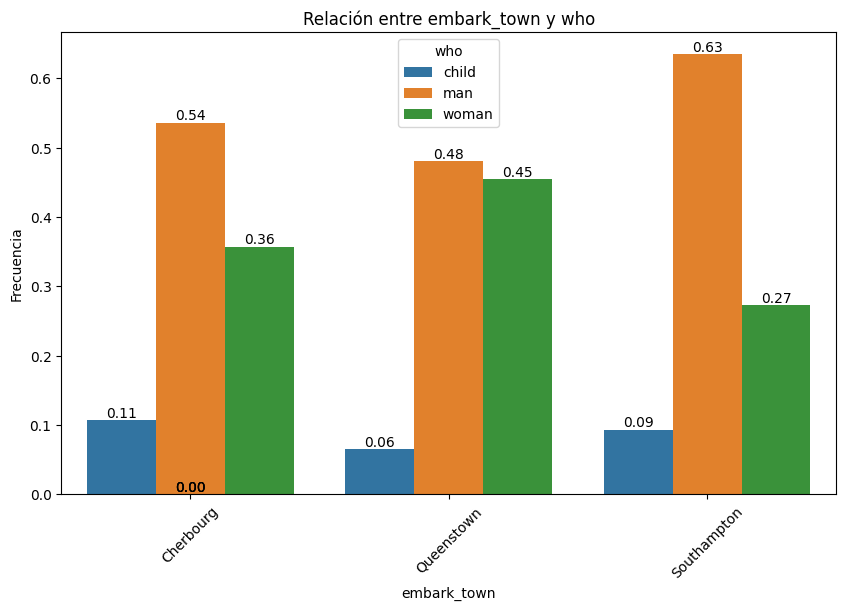

In [84]:
plot_categorical_relationship_fin(df_titanic, "embark_town","who", relative_freq= True, show_values= True)

Con la gráficas se puede ver que las mujeres de primera clase de Cherbourg habían sobrevivido en su mayoría. Habría que ver la relacion entre la combinacion who y clase para ver si tiene dependencia con embark town

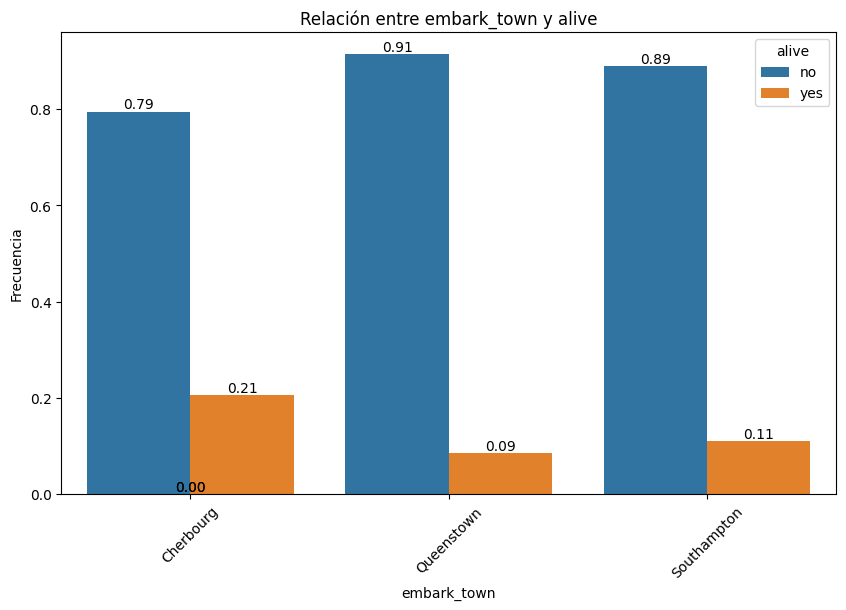

Valor Chi-Cuadrado: 3.3072128132305267
P-Value: 0.1913585459765817
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 34.35423197  30.830721   215.81504702]
 [  4.64576803   4.169279    29.18495298]]


In [85]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Third")].copy() 

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Se los hombres, son los de la tercera que más se acercan a una dependencia pero esto sigue sin ser suficiente

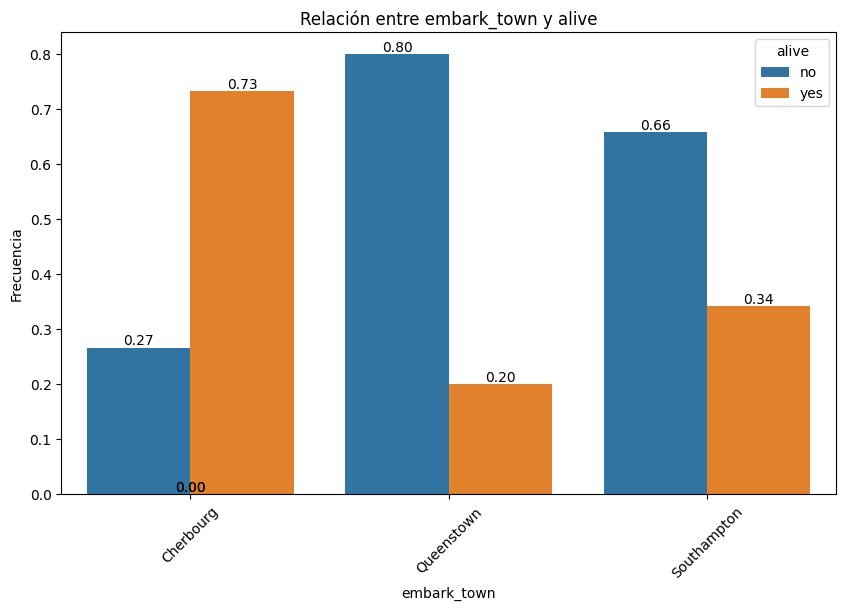

Valor Chi-Cuadrado: 7.903047315257843
P-Value: 0.019225386540995867
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8.53448276  2.84482759 21.62068966]
 [ 6.46551724  2.15517241 16.37931034]]


In [86]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "Third")].copy() 

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Entre los niños, son los de tercera los que si tienen una relación entre embarked_town y alive

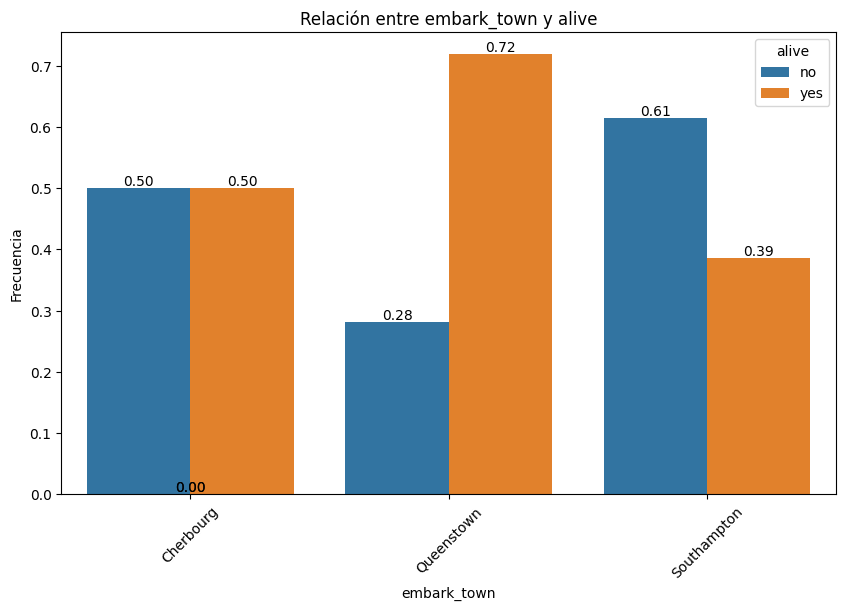

Valor Chi-Cuadrado: 9.750056078465867
P-Value: 0.007634880139676012
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 6.10526316 16.28070175 35.61403509]
 [ 5.89473684 15.71929825 34.38596491]]


In [87]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "Third")].copy() 

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Entre las mujeres, las de tercera también tienen dependencia entre embarked_town y alive

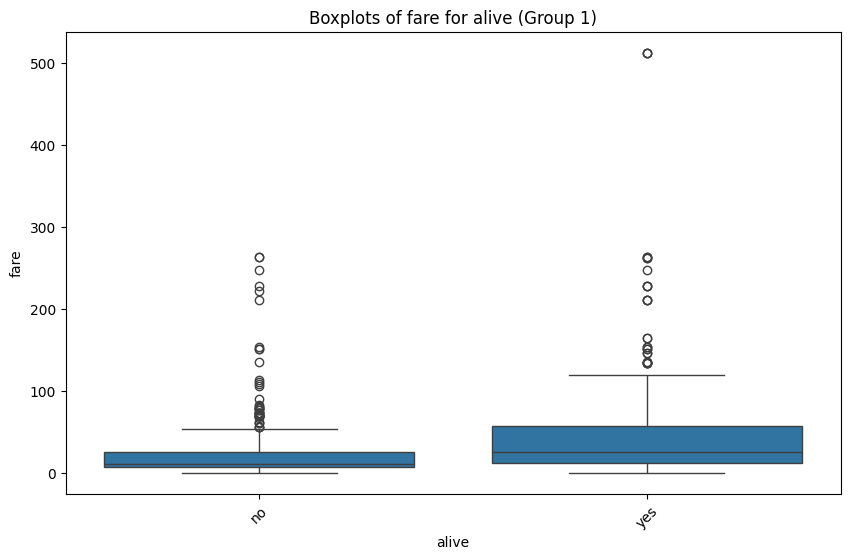

In [88]:
#4
plot_grouped_boxplots(df_titanic,"alive","fare")

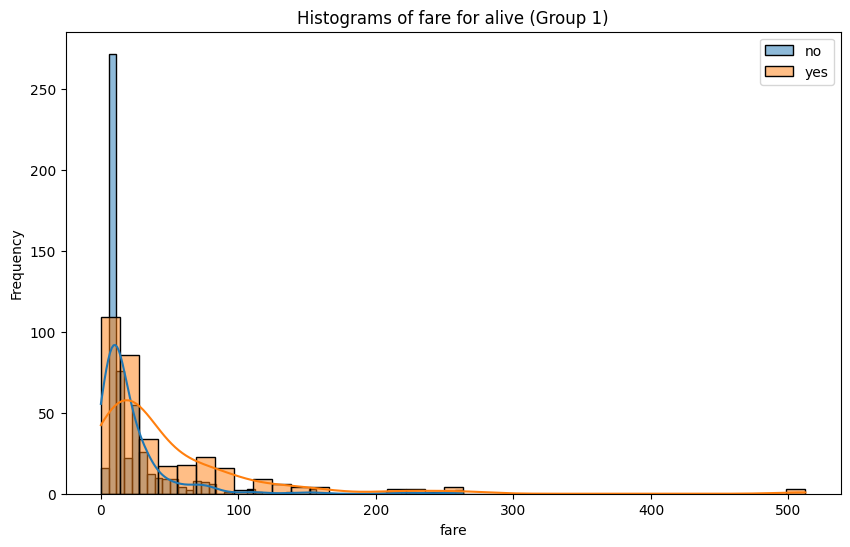

In [89]:
plot_grouped_histograms(df_titanic, "alive","fare", group_size = 2)

Parece que si hay dependencia

In [90]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

u_stat, p_value = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_value)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


p_value <0.05 por lo que si hay dependencia

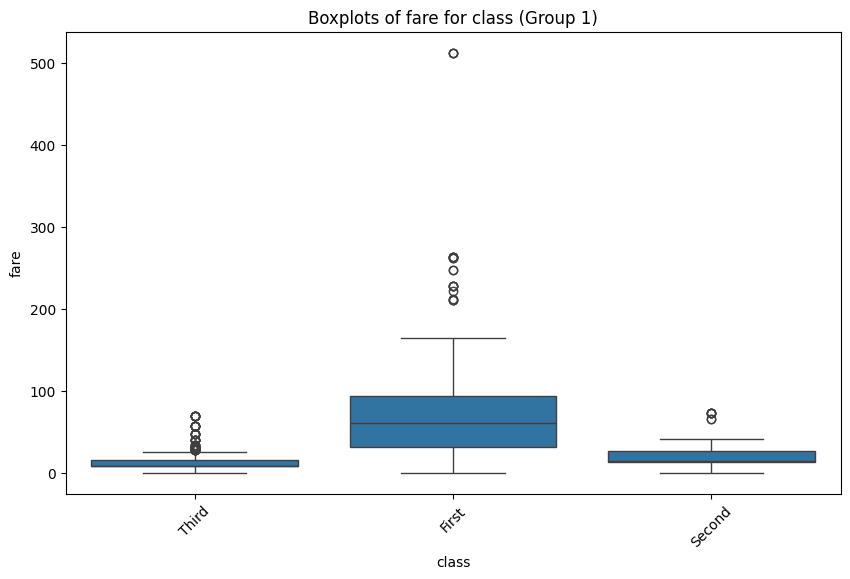

In [91]:
plot_grouped_boxplots(df_titanic,"class","fare")

In [92]:
df_alive = df_titanic.loc[df_titanic.alive == "yes"].copy()
df_dead = df_titanic.loc[df_titanic.alive == "no"].copy()

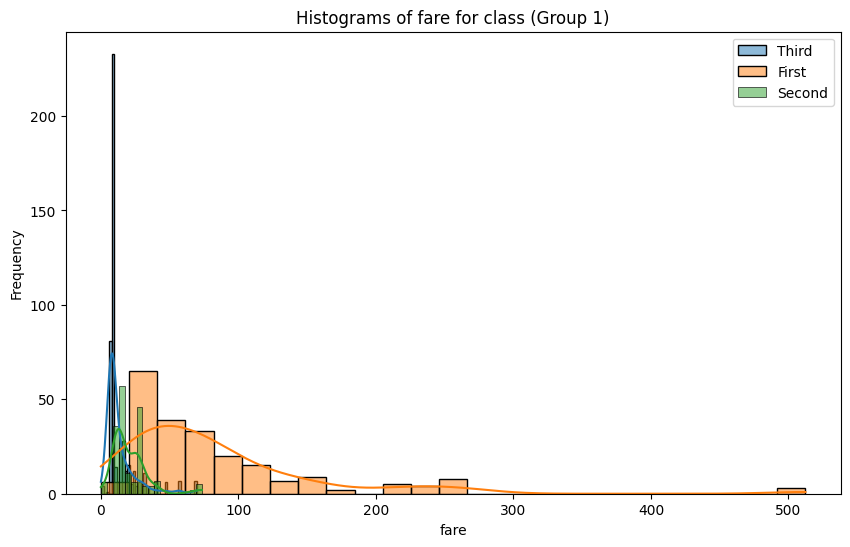

In [93]:
plot_grouped_histograms(df_titanic,"class","fare", group_size = 3)

In [94]:
#5
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_imputed
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0,False
263,male,40.0,0.0,First,man,True,Southampton,no,True,0,False
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0,False
277,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0,False
413,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
466,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
481,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0,False
633,male,30.0,0.0,First,man,True,Southampton,no,True,0,True


Podrían ser trabajadores

In [95]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_imputed
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,False
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,False
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,False


Los tres que más pagaron sobrevivieron

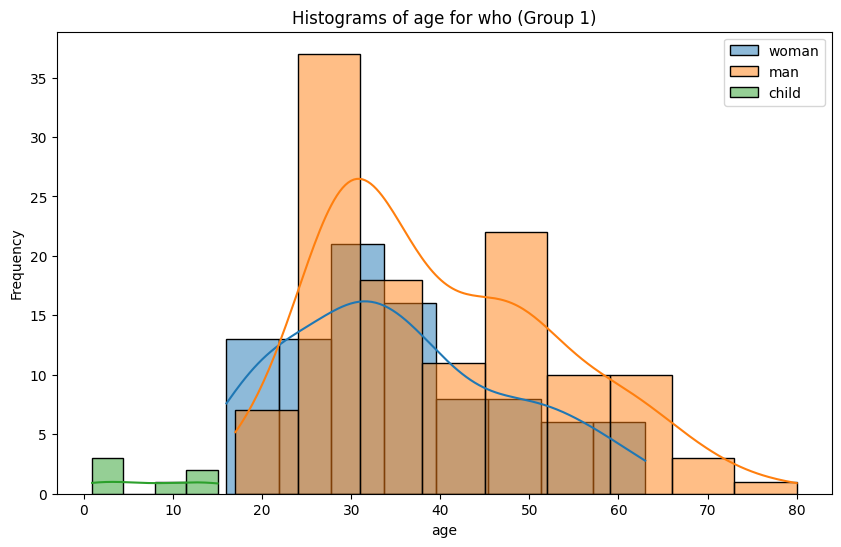

In [96]:
#6
df_first = df_titanic.loc[df_titanic["class"] == "First", ["age", "who"]]
plot_grouped_histograms(df_first, "who", "age", group_size=3)

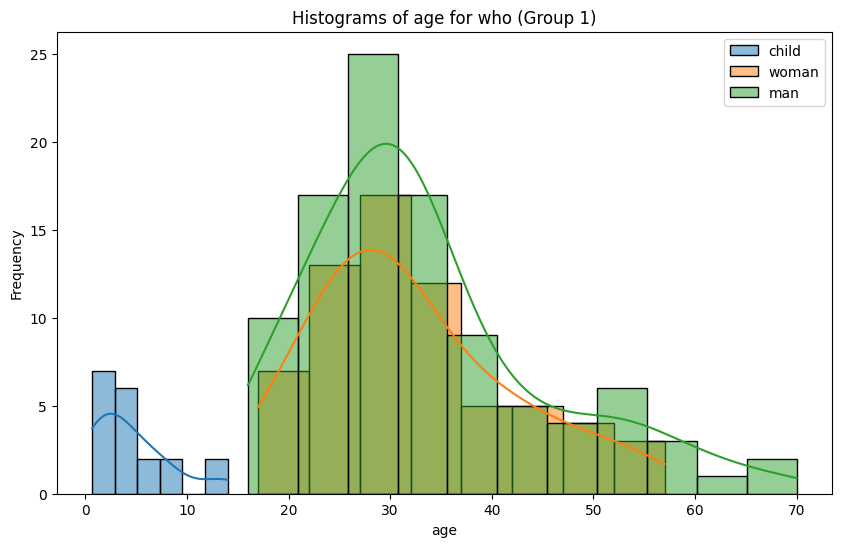

In [97]:
df_second = df_titanic.loc[df_titanic["class"] == "Second", ["age", "who"]]
plot_grouped_histograms(df_second, "who", "age", group_size=3)

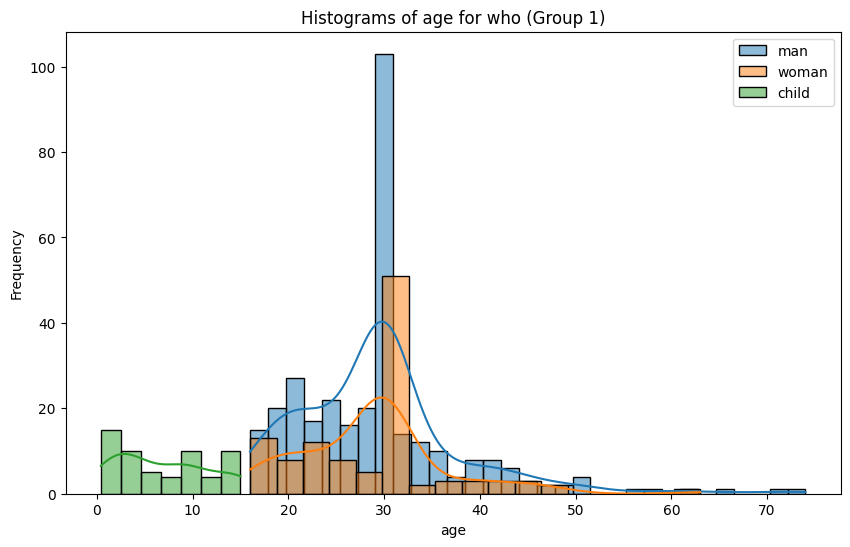

In [98]:
df_third = df_titanic.loc[df_titanic["class"] == "Third", ["age", "who"]]
plot_grouped_histograms(df_third, "who", "age", group_size=3)

(2,)


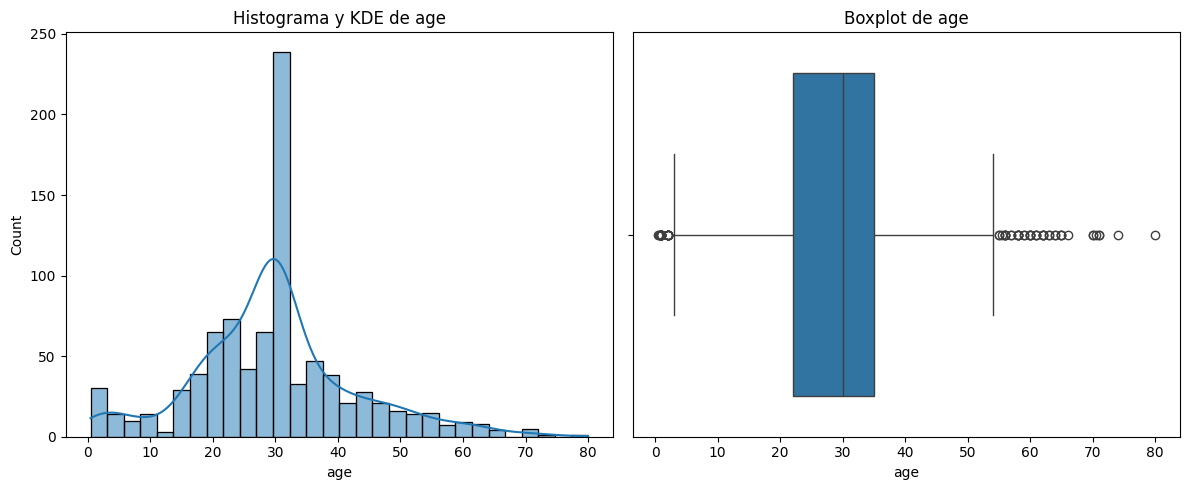

In [99]:
#7
plot_combined_graphs(df_titanic,["age"])

In [100]:
df_titanic.age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

Se categoriza age para compararlo con class y se tomán la información de describe para hacer los bins

In [101]:
bins = [0,22,30,35,80]
df_titanic["cat_age"] = pd.cut(df_titanic.age, bins = bins, labels = ["age_1","age_2","age_3","age_4"])

Respuesta age_1:


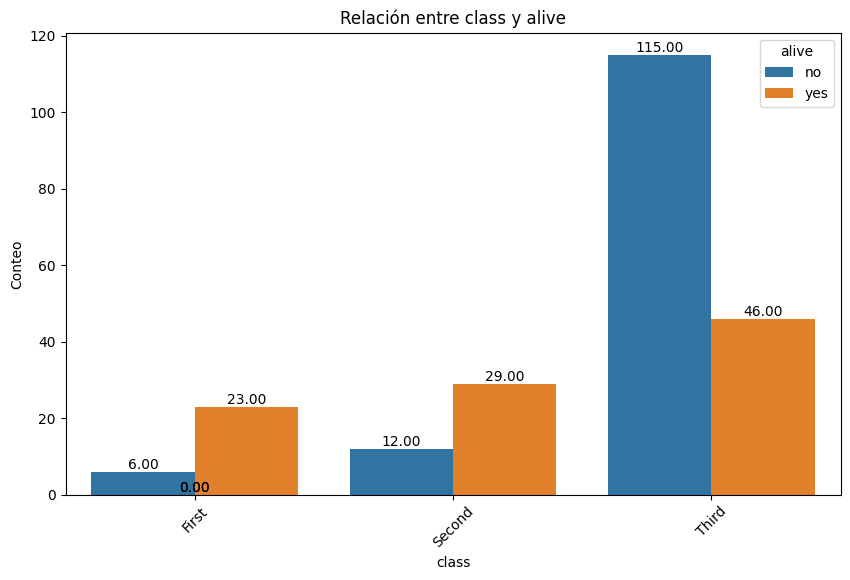

Respuesta age_4:


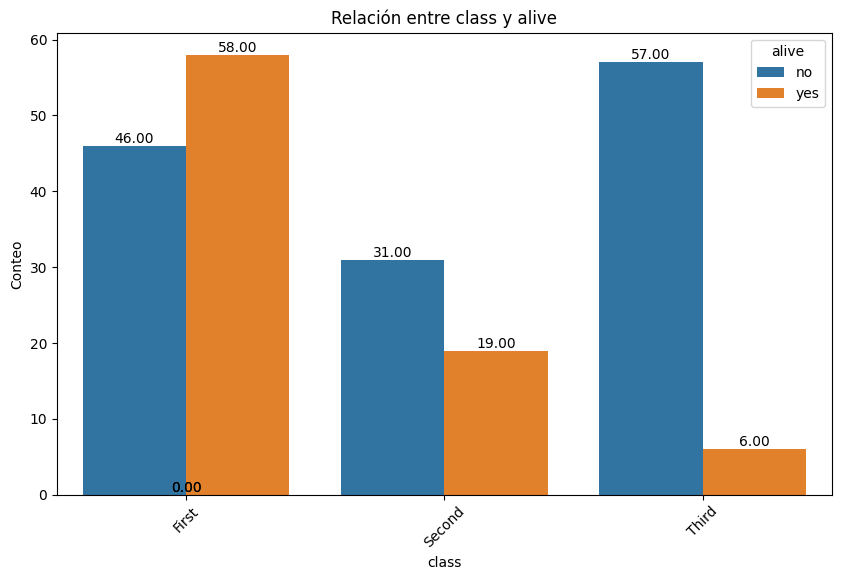

Respuesta age_2:


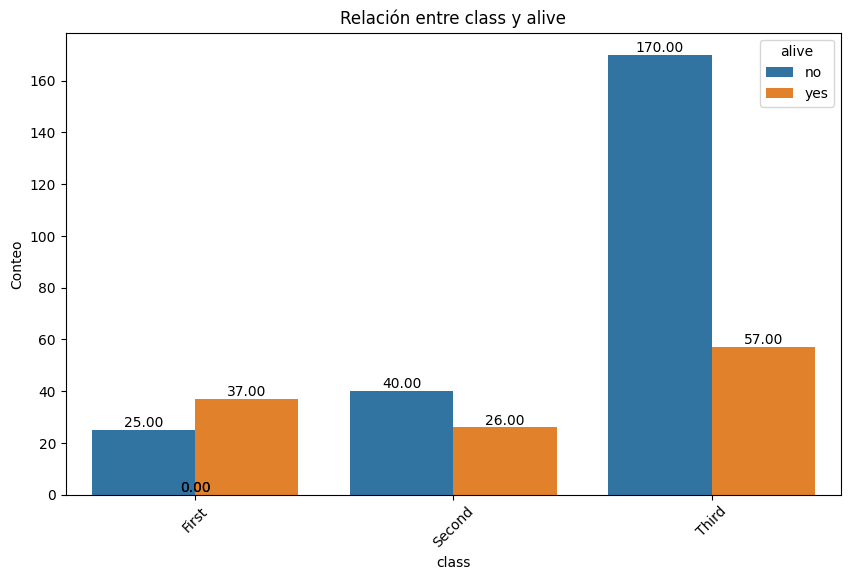

Respuesta age_3:


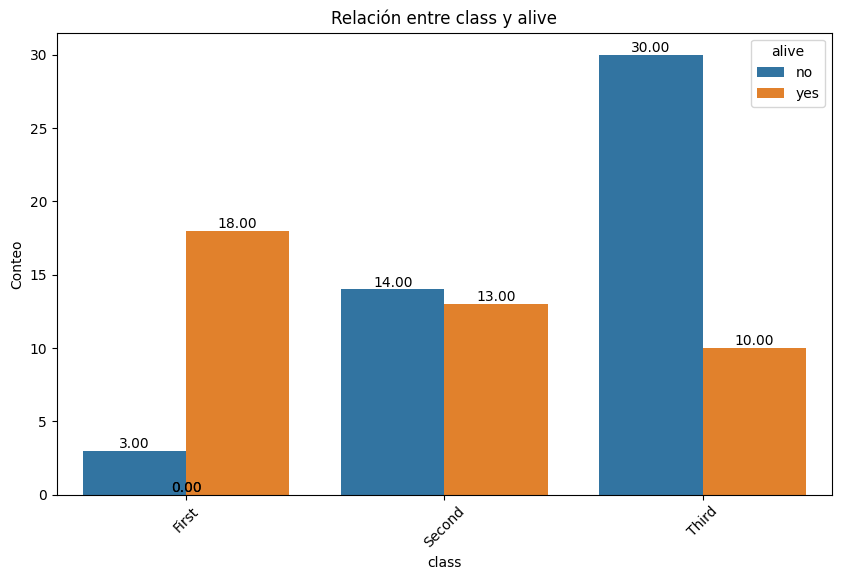

In [103]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)
tricategorical_analysis(df = df_titanic, directora = "cat_age", otras = ["alive","class"], muestra_valores = True)

En términos absolutos se muestra que los de primera clase especialmente los de 30 años sobrevivieron un número más grande de personas

Respuesta age_1:


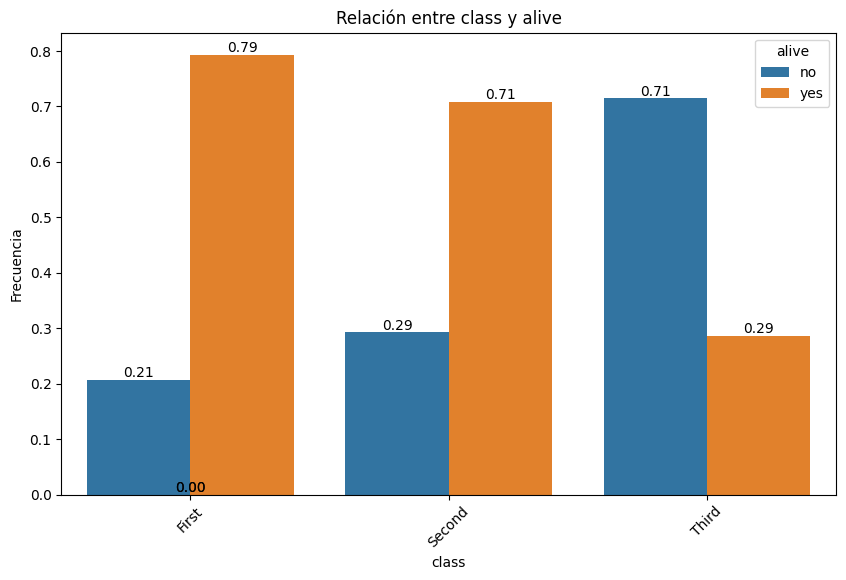

Respuesta age_4:


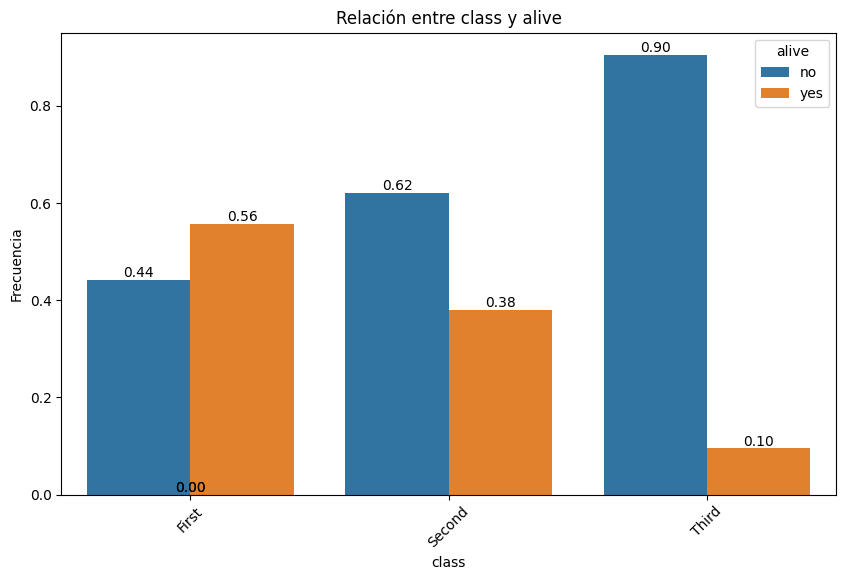

Respuesta age_2:


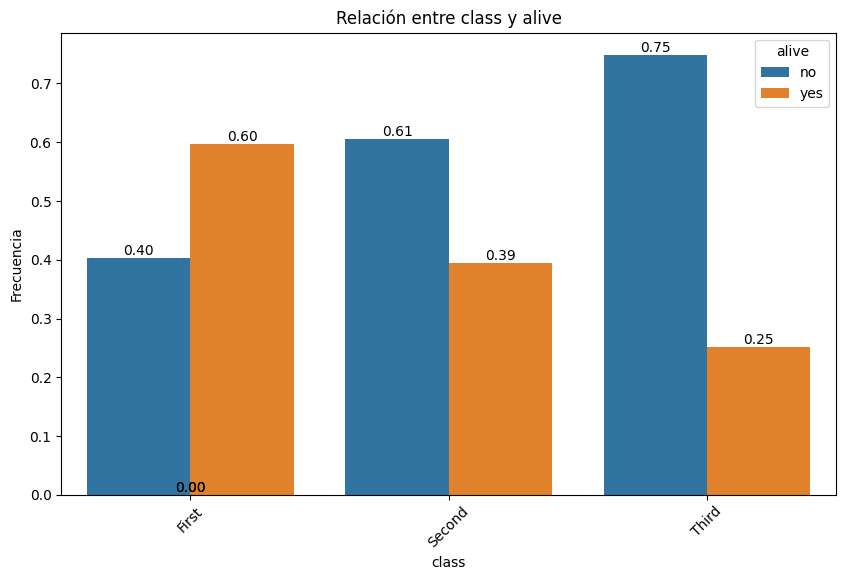

Respuesta age_3:


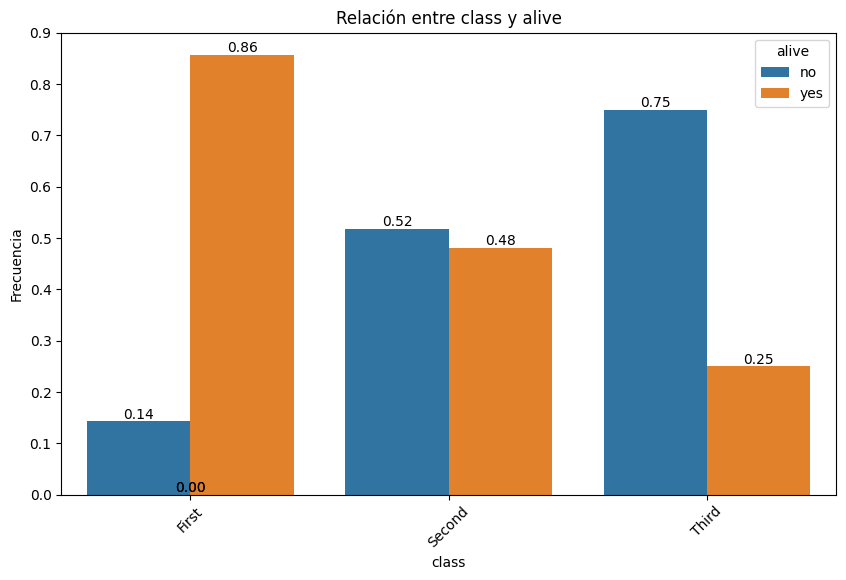

In [104]:
tricategorical_analysis(df = df_titanic, directora = "cat_age", otras = ["alive","class"], relativa= True, muestra_valores = True)

En terminos relativos muestra igualemente que los de primera clase tenían más probabilidades de sobrevivir

In [105]:
#8
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}

for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no:


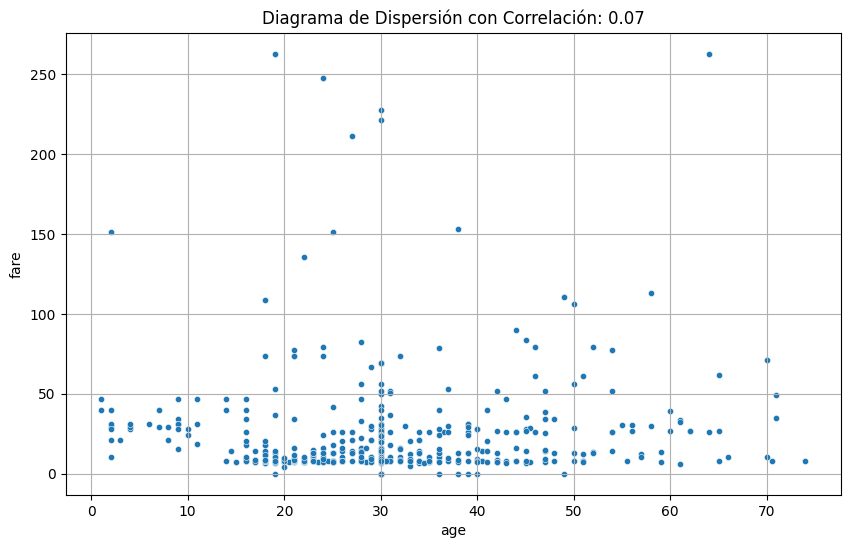

Respuesta yes:


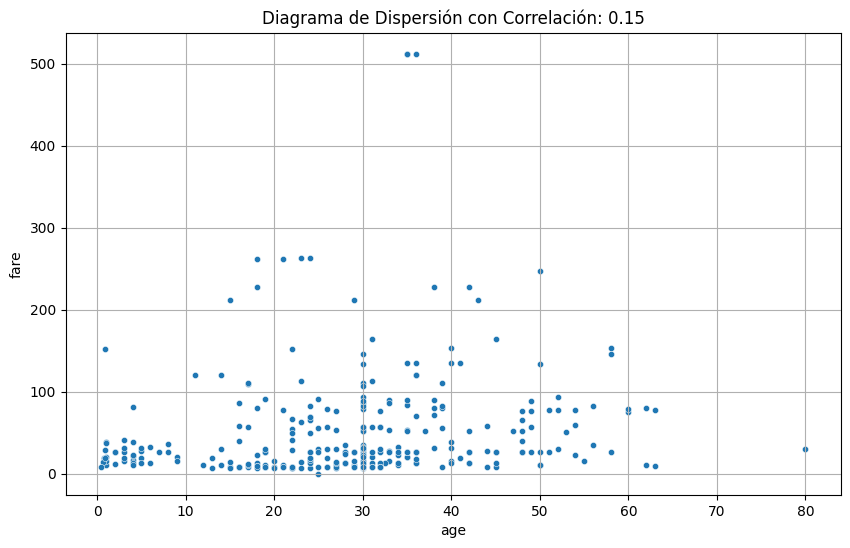

In [106]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?